In [7]:
import os 

import numpy as np
import scipy.stats as sps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import sys, os
sys.path += [os.path.abspath(os.pardir + '/code')]
print(sys.path)

from experiment import init_random_state, BanditLoopExperiment, get_ts_model

sns.set(font_scale=1.2, palette='tab20') 

['/home/anton/Desktop/m1p/2021-Project-74/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/anton/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/home/anton/.local/lib/python3.8/site-packages/IPython/extensions', '/home/anton/.ipython', '/home/anton/Desktop/m1p/2021-Project-74/code', '/home/anton/Desktop/m1p/2021-Project-74/code']


In [3]:
p = 0.9
Q = 1
w = 4
b = 0.0

T = 2000
M = 10
l = 4
interests, responses = [], []


for i in range(20):
    init_random_state(i)
    
    bandit = lambda: get_ts_model(M=M, l=l)
    exp = BanditLoopExperiment(bandit, "TS bandit")
    exp.prepare(w=w, Q=Q, p=p, b=b)
    exp.run_experiment(T=T)
    
    results = exp.get_as_np()
    interests.append(results.interest)
    responses.append(results.response)

In [4]:
sum_responces = []
for i in range(20):  
    sum_responces.append(np.cumsum(responses[i].reshape(2000, -1).sum(axis=1)))

sum_responces = np.array(sum_responces)
print(sum_responces.shape)

sum_interests = []
for i in range(20): 
    sum_interests.append(np.linalg.norm(interests[i] - interests[i][0], axis=1)**2)
    
sum_interests = np.array(sum_interests)
print(sum_interests.shape)


(20, 2000)
(20, 2000)


No handles with labels found to put in legend.


Text(0.5, 0, 'Шаг')

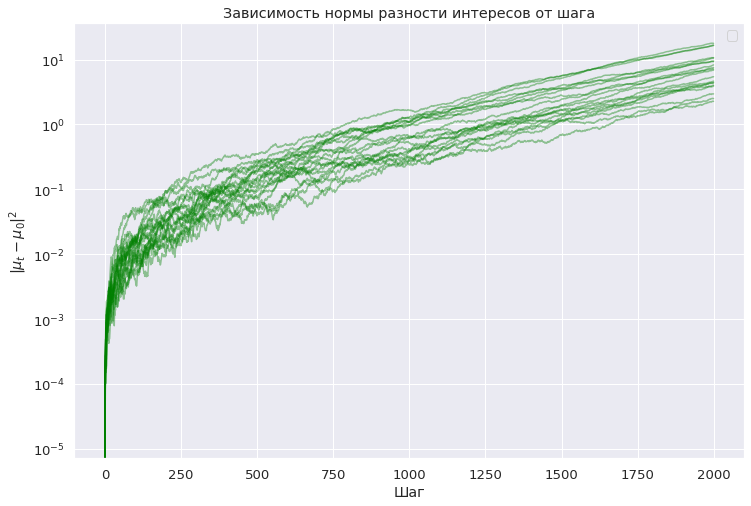

In [5]:

plt.figure(figsize=(12, 8))
for i in range(20):
    plt.plot(sum_interests[i],  color='green', alpha=0.4)
plt.yscale('log')
plt.ylabel(r'$\|\mu_t - \mu_0 \|^2$')
plt.title('Зависимость нормы разности интересов от шага')
plt.legend()
plt.xlabel('Шаг')
# plt.savefig('norm_interest.pdf')

No handles with labels found to put in legend.


Text(0.5, 0, 'Шаг')

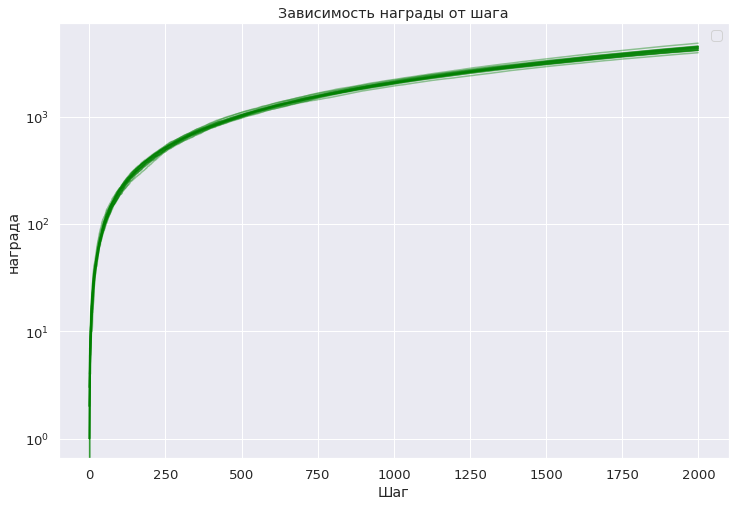

In [6]:
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.plot(sum_responces[i], color='green', alpha=0.4)
plt.yscale('log')
plt.ylabel('награда')
plt.title('Зависимость награды от шага')
plt.legend()
plt.xlabel('Шаг')
# plt.savefig('norm_interest.pdf')